# 기본

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [18]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [19]:
df = pd.read_csv('C:/Users/w7e7r/Desktop/스파르타/심화프로젝트/train.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


# boxplot

In [21]:
numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

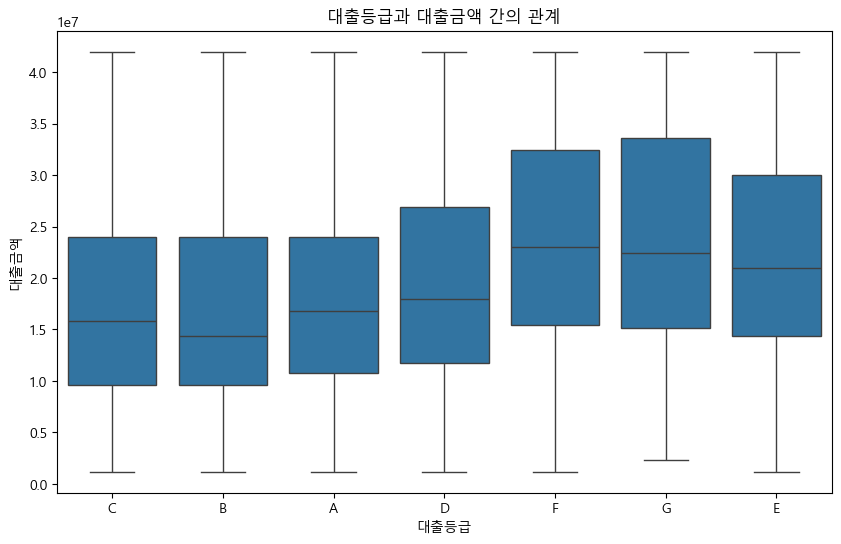

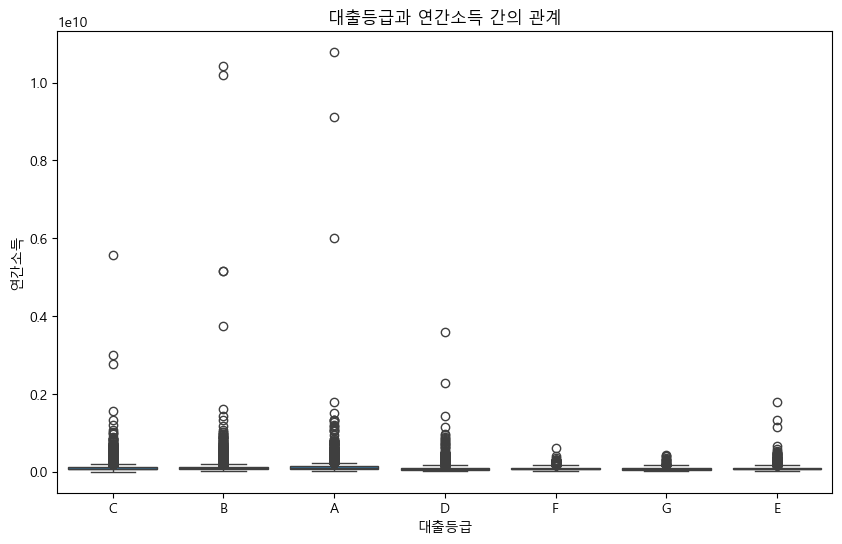

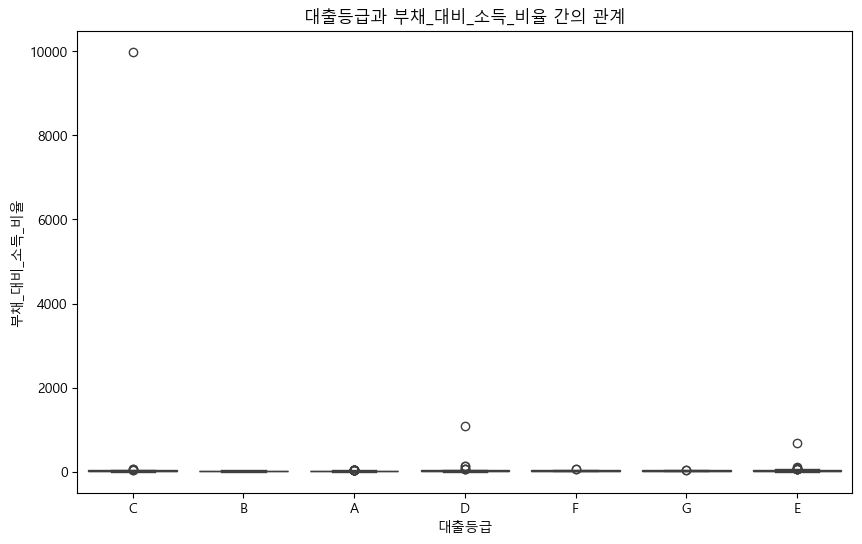

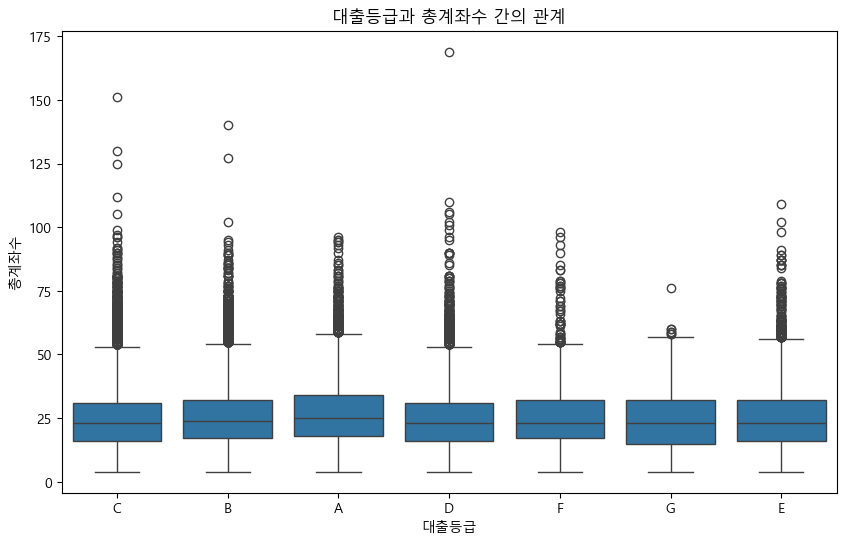

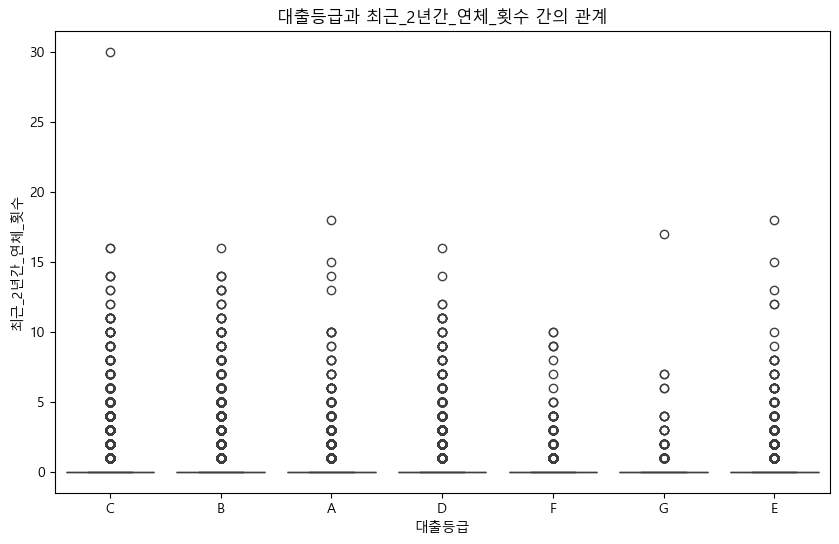

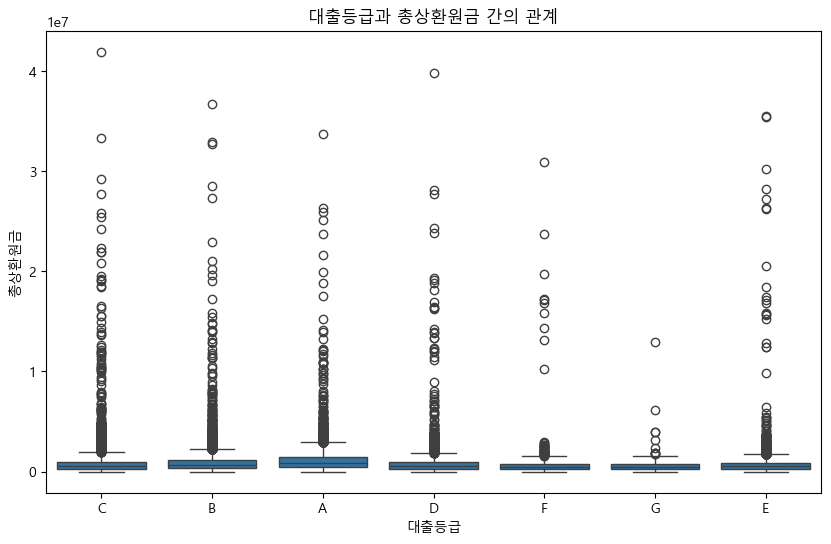

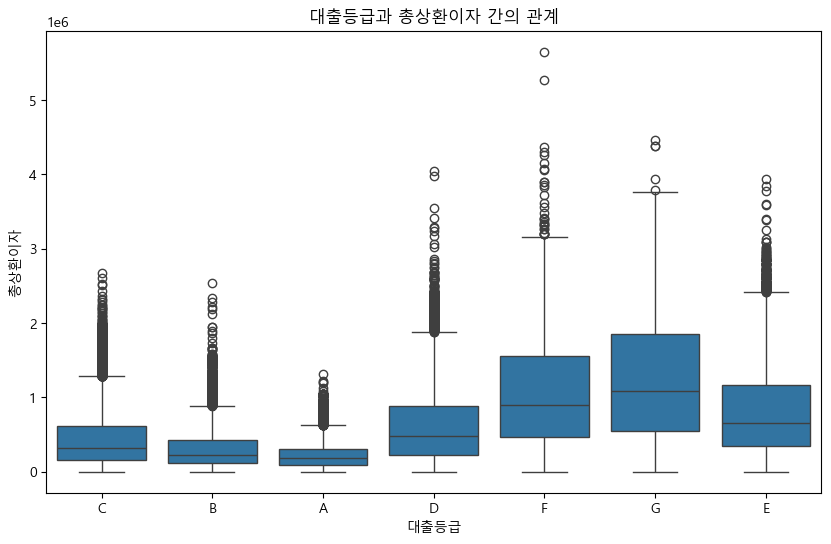

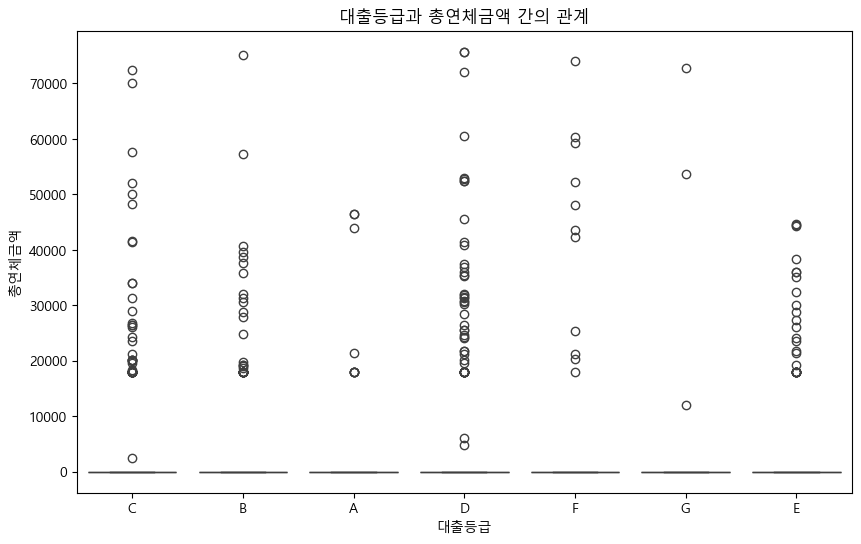

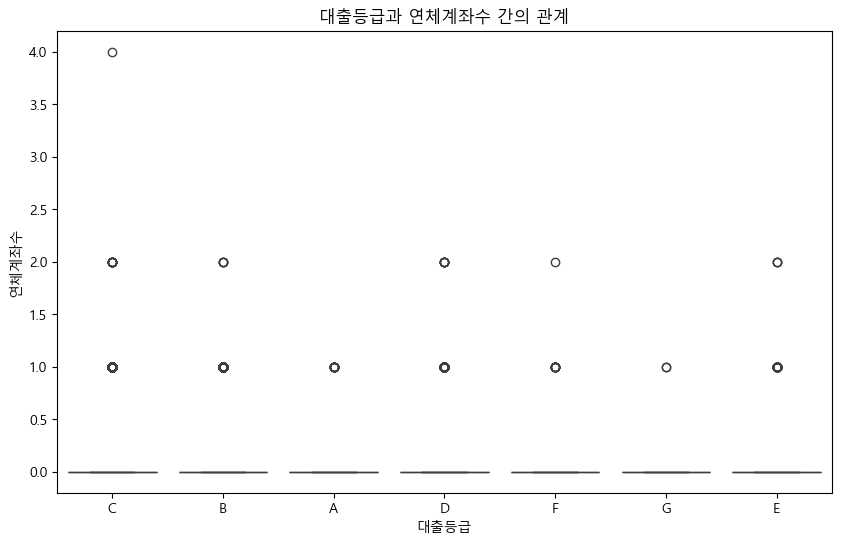

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수와 타겟 간의 관계 시각화
for column in numeric_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='대출등급', y=column, data=df)
    plt.title(f'대출등급과 {column} 간의 관계')
    plt.show()

# 근로기간 인코딩

In [23]:
def year_encoder(x):
    output = x.replace('years', '')
    output = output.replace('year', '')
    output = output.replace('+', '')
    output = output.replace('<', '')
    output = output.replace('Unknown', '-1').strip()
    output = int(output)

    return output

In [24]:
df['근로기간'] = df['근로기간'].apply(year_encoder)

# 주택소유상태 삭제

In [25]:
drop_index = df[df['주택소유상태'] == 'ANY'].index

df = df.drop(drop_index)

# 이상치

## 표준편차, 4분위수 이상치 확인

In [26]:
import numpy as np
numeric_cols = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액']
#표준편차, 사분위수 사용
def detect_outliers(df, col, method='std', threshold=3):
    if method == 'std':
        mean = np.mean(df[col])
        std_dev = np.std(df[col])
        lower_bound = mean - threshold * std_dev
        upper_bound = mean + threshold * std_dev
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    elif method == 'iqr':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers


for col in numeric_cols:
    outliers_std = detect_outliers(df, col, method='std', threshold=3)
    outliers_iqr = detect_outliers(df, col, method='iqr')
    print(f"표준편차를 이용한 {col} 이상치 수: {len(outliers_std)}")
    print(f"사분위 범위를 이용한 {col} 이상치 수: {len(outliers_iqr)}")

표준편차를 이용한 연간소득 이상치 수: 494
사분위 범위를 이용한 연간소득 이상치 수: 4347
표준편차를 이용한 총계좌수 이상치 수: 949
사분위 범위를 이용한 총계좌수 이상치 수: 2097
표준편차를 이용한 최근_2년간_연체_횟수 이상치 수: 1497
사분위 범위를 이용한 최근_2년간_연체_횟수 이상치 수: 19902
표준편차를 이용한 총상환원금 이상치 수: 667
사분위 범위를 이용한 총상환원금 이상치 수: 5196
표준편차를 이용한 총상환이자 이상치 수: 2012
사분위 범위를 이용한 총상환이자 이상치 수: 5878
표준편차를 이용한 총연체금액 이상치 수: 180
사분위 범위를 이용한 총연체금액 이상치 수: 181


## 표본편차로 이상치 제거

In [27]:
import numpy as np

numeric_cols = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액','부채_대비_소득_비율']

# 표준편차 사용하여 이상치 제거
def remove_outliers(df, col, threshold=3):
    mean = np.mean(df[col])
    std_dev = np.std(df[col])
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 이상치 제거 후 데이터프레임 생성
df = df.copy()  # 복사본 생성

for col in numeric_cols:
    df = remove_outliers(df, col, threshold=3)

# 이상치 제거 후 데이터프레임 크기 확인
print("이상치 제거 후 데이터프레임 크기:")
print(df)

이상치 제거 후 데이터프레임 크기:
                ID      대출금액        대출기간  근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months     6      RENT   72000000   
1      TRAIN_00001  14400000   60 months    10  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months     5  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months     8  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    -1      RENT   71736000   
...            ...       ...         ...   ...       ...        ...   
96289  TRAIN_96289  14400000   36 months    10  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months    10  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months     5  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months    10      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0            18.90    15  부채 통합             0       

-90618개

## 비율

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_cols의 비율 계산
numeric_ratios = df[numeric_col].mean() / df[numeric_col]
numeric_ratios

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,1.421060,1.238961,1.019496,1.640745,inf,inf,inf,inf,inf
1,1.231586,0.681997,0.862896,1.171961,inf,2.003364,1.642623,inf,inf
2,1.477903,0.929221,2.240520,1.757942,inf,0.805907,2.530355,inf,inf
3,1.231586,0.675797,1.276903,1.640745,inf,2.296948,2.511118,inf,inf
4,0.985269,1.243521,0.758900,1.295325,inf,3.274704,2.581113,inf,inf
...,...,...,...,...,...,...,...,...,...
96289,1.231586,0.424787,2.065217,0.745793,inf,0.767921,0.781181,inf,inf
96290,0.615793,0.675797,3.734200,0.984447,inf,1.282105,0.449631,inf,inf
96291,1.231586,1.061967,1.714277,1.118690,inf,0.502577,1.593760,inf,inf
96292,1.136848,1.344870,1.113784,1.171961,0.131624,0.542962,0.469971,inf,inf


In [29]:
grade_numeric_ratios = df.groupby('대출등급')[numeric_cols].mean() / df.groupby('대출등급')[numeric_cols].sum()
grade_numeric_ratios

,연간소득,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,부채_대비_소득_비율
대출등급,,,,,,,
A,0.000062,0.000062,0.000062,0.000062,0.000062,NaN,0.000062
B,0.000036,0.000036,0.000036,0.000036,0.000036,NaN,0.000036
C,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
D,0.000081,0.000081,0.000081,0.000081,0.000081,NaN,0.000081
E,0.000157,0.000157,0.000157,0.000157,0.000157,NaN,0.000157
F,0.000670,0.000670,0.000670,0.000670,0.000670,NaN,0.000670
G,0.003497,0.003497,0.003497,0.003497,0.003497,NaN,0.003497


# 명목형

## 시각화 및 비율

In [30]:
from scipy.stats import chi2_contingency

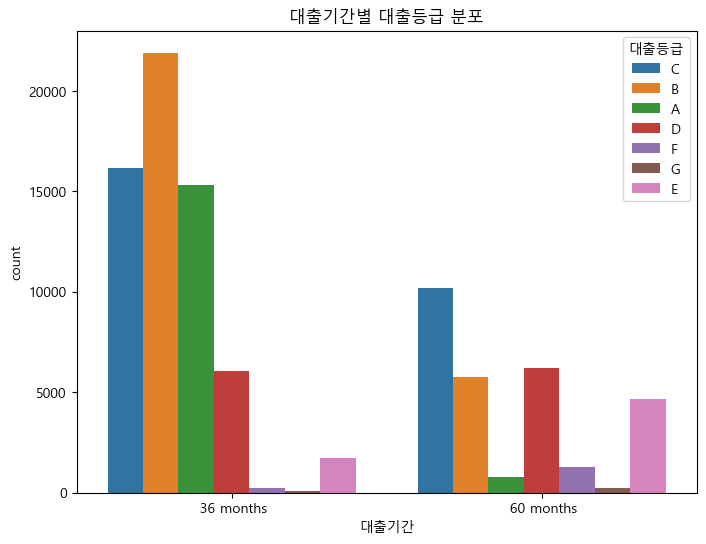

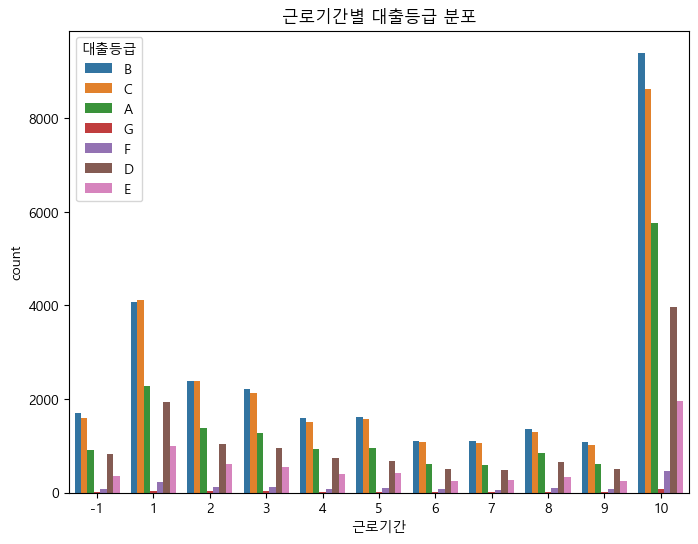

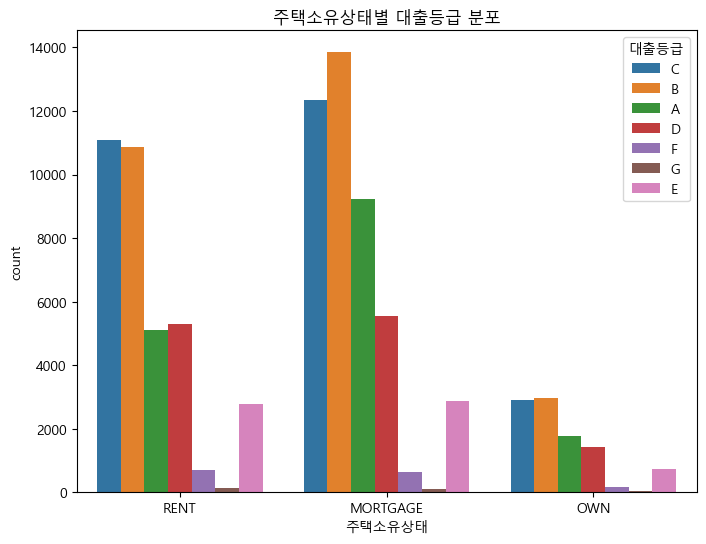

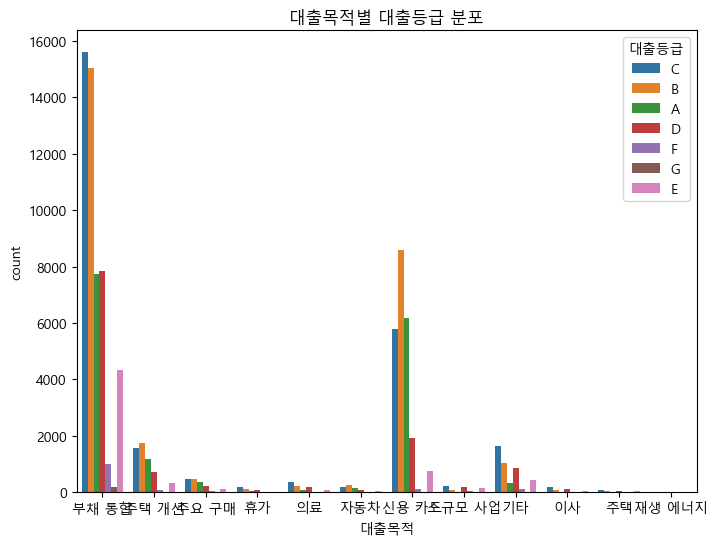

In [31]:
category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in category_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='대출등급', data=df)
    plt.title(f'{col}별 대출등급 분포')
    plt.show()

In [32]:
for col in category_col:
    contingency_table = pd.crosstab(df[col], df['대출등급'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}과 대출등급 간의 카이제곱 검정 결과:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    print("---------------------------------------------------")

대출기간과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 16579.477866640704
P-value: 0.0
---------------------------------------------------
근로기간과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 160.15446178844837
P-value: 4.665187294071588e-11
---------------------------------------------------
주택소유상태과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 718.3418170314637
P-value: 5.217373722489331e-146
---------------------------------------------------
대출목적과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 5304.49333774313
P-value: 0.0
---------------------------------------------------


### 근로기간

In [33]:
# '근로기간' 항목의 각 값에 대한 개수 세기
work_period_counts = df['근로기간'].value_counts()

# 전체 행의 개수
total_rows = len(df)

# 근로기간별 비율 계산
work_period_ratios = work_period_counts / total_rows

# 결과 출력
print("근로기간별 비율:")
print(work_period_ratios)

근로기간별 비율:
 10    0.334117
 1     0.150875
 2     0.087698
 3     0.080117
-1     0.060463
 5     0.059006
 4     0.058134
 8     0.050729
 6     0.040136
 7     0.039584
 9     0.039142
Name: 근로기간, dtype: float64


In [34]:
# 근로기간과 대출등급 간의 그룹화하여 개수 세기
work_period_loan_grade_counts = df.groupby(['근로기간', '대출등급']).size()

# 전체 행의 개수
total_rows = len(df)

# 각 그룹별 비율 계산
work_period_loan_grade_ratios = work_period_loan_grade_counts / total_rows

# 결과 출력
print("근로기간과 대출등급별 비율:")
print(work_period_loan_grade_ratios)

근로기간과 대출등급별 비율:
근로기간  대출등급
-1    A       0.010064
      B       0.018804
      C       0.017480
      D       0.009170
      E       0.003840
                ...   
 10   C       0.095290
      D       0.043876
      E       0.021552
      F       0.005054
      G       0.000938
Length: 77, dtype: float64


In [35]:
work_period_loan_grade_ratios_pivot = work_period_loan_grade_ratios.unstack()

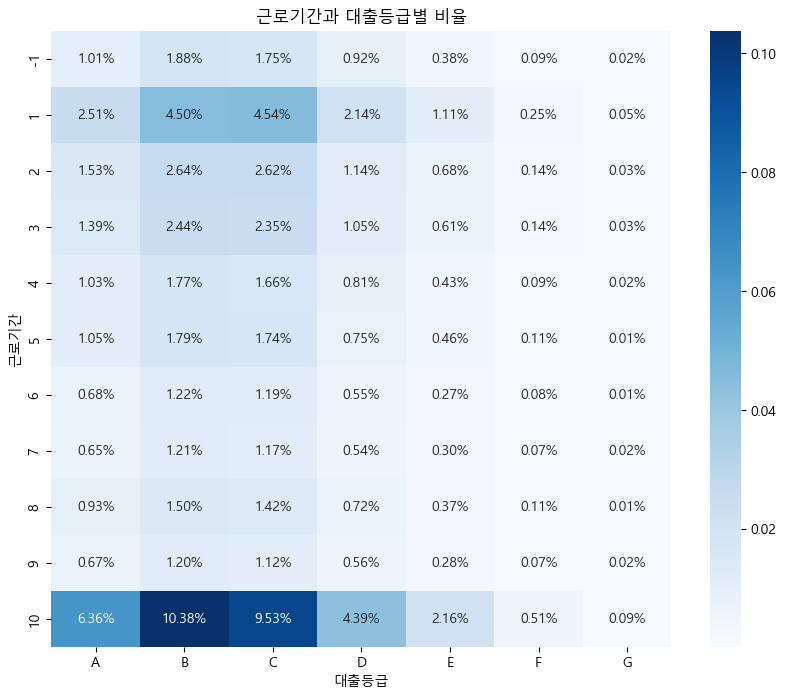

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(work_period_loan_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("근로기간과 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("근로기간")
plt.show()

### 주택소유상태

In [39]:
# 주택소유상태의 각 값에 대한 개수 세기
house_counts = df['주택소유상태'].value_counts()

# 전체 행의 개수
total_rows = len(df)

# 주택소유상태별 비율 계산
house_ratios = house_counts / total_rows

# 결과 출력
print("주택소유상태별 비율:")
print(house_ratios)

주택소유상태별 비율:
MORTGAGE    0.492264
RENT        0.397107
OWN         0.110629
Name: 주택소유상태, dtype: float64


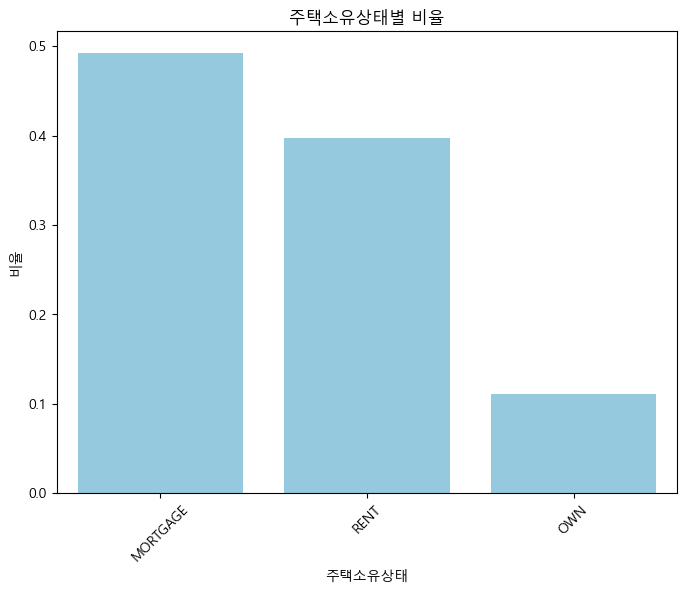

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x=house_ratios.index, y=house_ratios.values, color='skyblue')
plt.title("주택소유상태별 비율")
plt.xlabel("주택소유상태")
plt.ylabel("비율")
plt.xticks(rotation=45)  
plt.show()

In [42]:
# 주택소유상태와 대출등급 간의 그룹화하여 개수 세기
house_grade_counts = df.groupby(['주택소유상태', '대출등급']).size()

# 전체 행의 개수
total_rows = len(df)

# 각 그룹별 비율 계산
house_grade_ratios = house_grade_counts / total_rows

# 결과 출력
print("주택소유상태와 대출등급별 비율:")
print(house_grade_ratios)

주택소유상태와 대출등급별 비율:
주택소유상태    대출등급
MORTGAGE  A       0.101900
          B       0.152740
          C       0.136375
          D       0.061235
          E       0.031760
          F       0.007030
          G       0.001225
OWN       A       0.019698
          B       0.032643
          C       0.032014
          D       0.015935
          E       0.008166
          F       0.001766
          G       0.000408
RENT      A       0.056424
          B       0.120009
          C       0.122470
          D       0.058421
          E       0.030579
          F       0.007681
          G       0.001523
dtype: float64


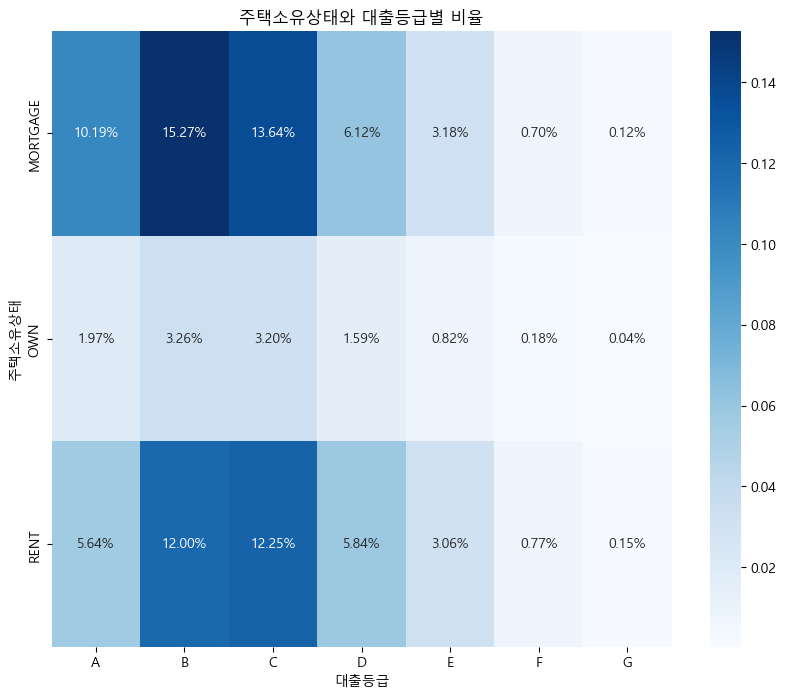

In [43]:
# 데이터프레임을 피벗하여 heatmap을 그리기 위한 형태로 변환
house_grade_ratios_pivot = house_grade_ratios.unstack()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(house_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("주택소유상태와 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("주택소유상태")
plt.show()

### 대출목적

In [44]:
# 대출목적별 각 값에 대한 개수 세기
loan_counts = df['대출목적'].value_counts()

# 전체 행의 개수
total_rows = len(df)

# 대출목적별 비율 계산
loan_ratios = loan_counts / total_rows

# 결과 출력
print("대출목적별 비율:")
print(loan_ratios)

대출목적별 비율:
부채 통합     0.570494
신용 카드     0.257785
주택 개선     0.062802
기타        0.049196
주요 구매     0.018595
의료        0.010958
자동차       0.008321
소규모 사업    0.007979
이사        0.005286
휴가        0.004999
주택        0.002946
재생 에너지    0.000640
Name: 대출목적, dtype: float64


C:\Users\w7e7r\AppData\Local\Temp\ipykernel_13928\1824328578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_ratios.index, y=loan_ratios.values, palette='Blues')


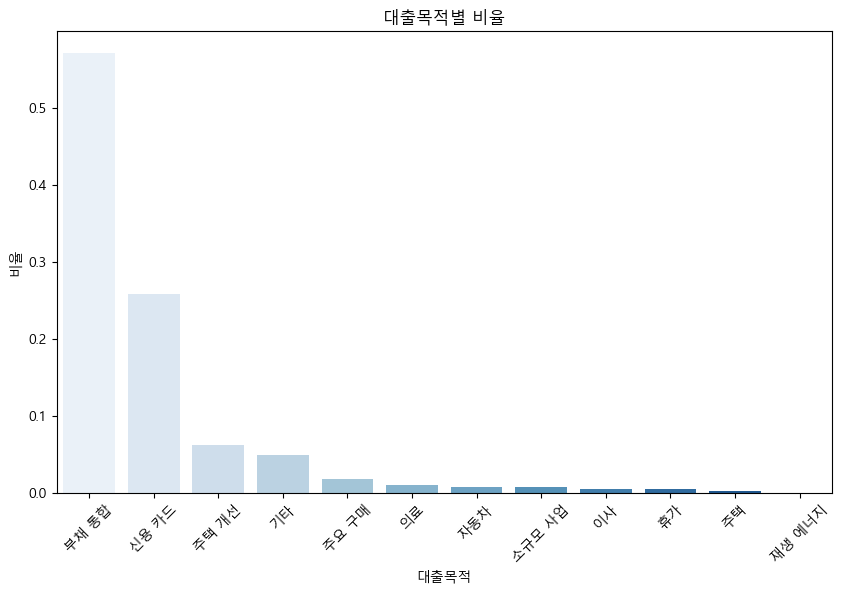

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_ratios.index, y=loan_ratios.values, palette='Blues')
plt.title("대출목적별 비율")
plt.xlabel("대출목적")
plt.ylabel("비율")
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.show()

In [46]:
# 대출목적과 대출등급 간의 그룹화하여 개수 세기
purpose_loan_grade_counts = df.groupby(['대출목적', '대출등급']).size()

# 전체 행의 개수
total_rows = len(df)

# 각 그룹별 비율 계산
purpose_loan_grade_ratios = purpose_loan_grade_counts / total_rows

# 결과 출력
print("대출목적과 대출등급별 비율:")
print(purpose_loan_grade_ratios)

대출목적과 대출등급별 비율:
대출목적  대출등급
기타    A       0.003752
      B       0.011510
      C       0.018043
      D       0.009501
      E       0.004690
                ...   
휴가    B       0.001291
      C       0.002141
      D       0.000817
      E       0.000276
      F       0.000033
Length: 82, dtype: float64


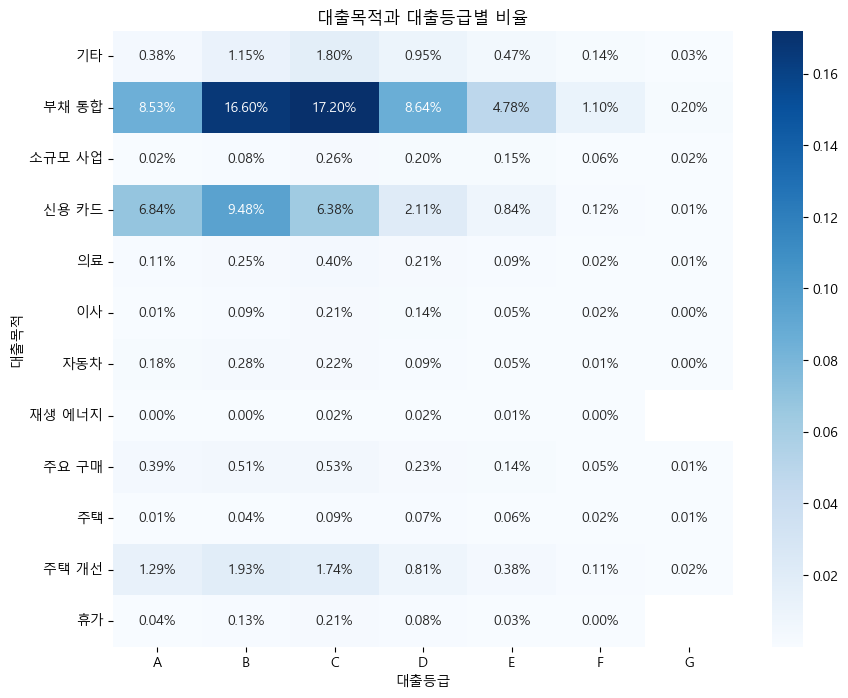

In [47]:
purpose_loan_grade_ratios_pivot = purpose_loan_grade_ratios.unstack()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(purpose_loan_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("대출목적과 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("대출목적")
plt.show()

# 인코딩

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le= LabelEncoder()
oe=OneHotEncoder()

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', '대출등급'], axis=1)
y = df[['대출등급']]

print(X.shape, y.shape)

(90618, 13) (90618, 1)


In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y['대출등급'])


y['대출등급'] = le.transform(y['대출등급'])
y

C:\Users\w7e7r\AppData\Local\Temp\ipykernel_13928\339760381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['대출등급'] = le.transform(y['대출등급'])


,대출등급
0,4
1,5
2,6
3,4
4,5
...,...
96289,4
96290,2
96291,6
96292,3


In [70]:
oe_csr = oe.fit_transform(df[['대출기간', '주택소유상태', '대출목적']])
oe_csr_df = pd.DataFrame(oe_csr.toarray(), columns= oe.get_feature_names_out())
oe_csr_df.head(5)

,대출기간_ 36 months,대출기간_ 60 months,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 스케일링

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sd_sc=StandardScaler()
mm_sc=MinMaxScaler()

In [62]:
def numeric_scaler(X):
    
    sd_sc_col = ['총연체금액','최근_2년간_연체_횟수','연체계좌수']
    mm_sc_col = ['대출금액','총상환원금','총상환이자','연간소득','총계좌수','부채_대비_소득_비율']


    X[sd_sc_col] = sd_sc.fit_transform(X[sd_sc_col])
    X[mm_sc_col] = mm_sc.fit_transform(X[mm_sc_col])
    
    return X

X = numeric_scaler(X)

In [63]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,4
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,5
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,6
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,4
4,TRAIN_00004,18000000,60 months,-1,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,5


# 모델링

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
target_variable = '대출등급'

feature_variables = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수','대출기간', '근로기간', '주택소유상태', '대출목적']

In [66]:
X = df[feature_variables]
y = df[target_variable]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X = df[feature_variables]
y = df[target_variable]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: ' 60 months'

In [72]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("모델 정확도:", accuracy)

ValueError: could not convert string to float: ' 36 months'